# Python Workshop 9/22

Note to instructors:

Jupyter uses Markdown to format text in the cells. [Here's](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) a good cheat sheet to show how to comment on here. 

In order to get it on your laptop, make sure you have Python install and install it via pip
`pip install jupyter`. The packages we'll need for this tutorial are `numpy`, `pandas`, and `matplotlib` so use pip to install those as well. Once you have those install, run `jupyter notebook` in your terminal and click the link it provides if it doesn't automatically open in your browser. [Here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html) is an overview of some of the basic functionality of jupyter notebooks and how to navigate.

# Importing Packages

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Basic

## Variable assignment

In [3]:
2 + 2

4

In [4]:
x = 2 + 2

In [5]:
x

4

In [6]:
x + 3

7

## Data Types

Continue adding basics from powerpoint...

## Functions

## Lists

## Pandas

Pandas is a powerful python library used for data analysis. Here we will go over only the basics where we'll try to summarize data and create some plots

Here I'm just creating random data but once we find data we want to use we'll import it
`df = pd.read_csv('path/to/data')`

In [7]:
df = pd.DataFrame({"continuous": np.random.rand(10), "category": np.random.choice(['A', 'B', 'C'], 10, replace=True)}) 

We saw above that lists contain numbers, or more generally, lists contain data that we want to manipulate. Pandas introduces dataframes which we'll instead use to store the data we work with. They look like tables like this:

In [8]:
df

,category,continuous
0,C,0.506058
1,B,0.001827
2,A,0.049434
3,C,0.192726
4,B,0.706403
5,C,0.725204
6,B,0.981750
7,C,0.782325
8,A,0.860355
9,A,0.042525


We can take the mean and standard deviation to summarize the data. The mean is like the average value which is pretty much describing what value the data is close to. For example, if for one week Julie studies 5 hours on Monday, 4 on Tuesday, 3 on Wednesday, 3 on Thursday and 0 on Friday. The mean would be 5 + 4 + 3 + 3 + 0/ 5 = 3 so on average Julie studied 3 hours per day that week. The standard deviation measures how dispersed the data is. Going back to the example for Julie, if she had studied 3 hours consistently each day instead, there would be no dispersion in the data since the values are all the same so the standard deviation is 0.

We can select data using the syntax with the name of the column you want to select in square brackets: ["column name"]. Note that it's case sensitive so you must type in the column name exactly how it's displayed

In [9]:
mean = df["continuous"].mean()
mean

0.4848606856868291

In [10]:
std = df["continuous"].std()
std

0.3782409537388958

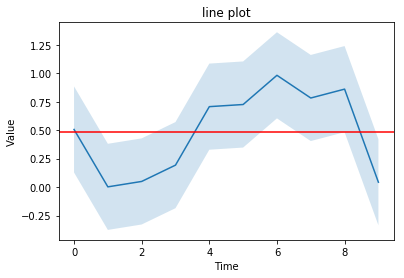

In [71]:
ax = df["continuous"].plot(kind='line', title='line plot', x='time', y='value')
ax.fill_between(df.index, df['continuous'] - std, df['continuous'] + std, alpha=0.2)
ax.axhline(y=mean, color='r')
ax.set_xlabel("Time")
ax.set_ylabel("Value")
plt.show()

## Plotting with Pandas
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

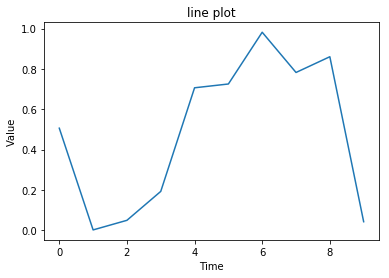

In [30]:
ax = df["continuous"].plot(kind='line', title='line plot')
ax.set_xlabel("Time")
ax.set_ylabel("Value")
plt.show()

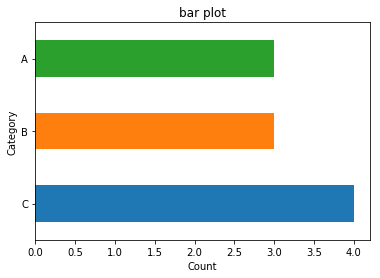

In [31]:
ax = df["category"].value_counts().plot(kind='barh', title='bar plot', x='category', y='count')
ax.set_xlabel("Count")
ax.set_ylabel("Category")
plt.show()

## Preparing data (not part of workshop)

In [34]:
import os

In [35]:
health_df = pd.read_csv(os.path.join("data", "Public_Health_Statistics-_Life_Expectancy_By_Community_Area.csv"))

In [38]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 11 columns):
Community Area Number    77 non-null float64
Community Area           78 non-null object
1990 Life Expectancy     78 non-null float64
1990 Lower 95% CI        78 non-null float64
1990 Upper 95% CI        78 non-null float64
2000 Life Expectancy     78 non-null float64
2000 Lower 95% CI        78 non-null float64
2000 Upper 95% CI        78 non-null float64
2010 Life Expectancy     78 non-null float64
2010 Lower 95% CI        78 non-null float64
2010 Upper 95% CI        78 non-null float64
dtypes: float64(10), object(1)
memory usage: 6.8+ KB


Average life expectancy data. To make it easier for students to work with, we'll get rid of the confidence interval columns and only keep 2010 and 2000 life expectancy

In [43]:
health_df[["Community Area", "2000 Life Expectancy", "2010 Life Expectancy"]].to_csv(
    os.path.join("data", "cleaned_health.csv"), index=False)

In [44]:
parks_df = pd.read_csv(os.path.join("data", "CPD_Parks.csv"))

Boundaries of chicago park districts with different characteristics. It may be a bit overwhelming to work with 77 columns so I'll only include location and area size for now; feel free to add others

In [45]:
parks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 77 columns):
PARK          597 non-null object
PARK_NO       597 non-null int64
LOCATION      596 non-null object
ZIP           596 non-null float64
ACRES         597 non-null float64
WARD          597 non-null int64
PARK_CLASS    597 non-null object
WHEELCHR_A    597 non-null int64
ALFRED_CAL    597 non-null int64
ARCHERY_RA    597 non-null int64
ARTIFICIAL    597 non-null int64
BAND_SHELL    597 non-null int64
BASEBALL_B    597 non-null int64
BASKETBALL    597 non-null int64
BASKETBA_1    597 non-null int64
BEACH         597 non-null int64
BOAT_LAUNC    597 non-null int64
BOAT_LAU_1    597 non-null int64
BOAT_SLIPS    597 non-null int64
BOCCE_COUR    597 non-null int64
BOWLING_GR    597 non-null int64
CASTING_PI    597 non-null int64
FOOTBALL_S    597 non-null int64
COMMUNITY_    597 non-null int64
CONSERVATO    597 non-null int64
CULTURAL_C    597 non-null int64
DOG_FRIEND    597 non-null int

In [47]:
parks_df.head(5)

,PARK,PARK_NO,LOCATION,ZIP,ACRES,WARD,PARK_CLASS,WHEELCHR_A,ALFRED_CAL,ARCHERY_RA,...,SHAPE_AREA,SHAPE_LEN,CAROUSEL,CROQUET,HANDBALL_I,HARBOR,MODELTRAIN,MODELYACHT,NATURE_BIR,MINIGOLF
0,TILTON (GEORGE),1064,305 N KOSTNER,60624.0,1.14,28,NEIGHBORHOOD PARK,0,0,0,...,42733.898744,829.431236,0,0,0,0,0,0,0,0
1,BRAINERD,177,1246 W 92ND ST,60620.0,9.26,21,COMMUNITY PARK,0,0,0,...,357991.194763,2393.296180,0,0,0,0,0,0,0,0
2,ELSTON (DANIEL),1097,3461 N TROY ST,60618.0,0.52,33,MINI-PARK,0,0,0,...,17678.352371,523.238015,0,0,0,0,0,0,0,0
3,WENDT (KENNETH),1145,667 W ROSCOE ST,60657.0,0.17,44,MINI-PARK,0,0,0,...,6595.907769,364.574978,0,0,0,0,0,0,0,0
4,DIXON (LORRAINE),1210,8931 S DAUPHIN AVE,60619.0,6.72,8,LINEAR PARK,0,0,0,...,255649.300263,5729.393137,0,0,0,0,0,0,0,0


In [48]:
parks_df[["PARK", "ZIP", "ACRES", "WARD"]].to_csv(os.path.join("data", "cleaned_park.csv"), index=False)

Libraries - number of vistors per month by location in 2014

In [49]:
library_df = pd.read_csv(os.path.join("data", "Libraries_-_2014_Visitors_by_Location.csv"))

In [50]:
library_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 17 columns):
LOCATION     79 non-null object
ADDRESS      79 non-null object
CITY         79 non-null object
ZIP CODE     79 non-null int64
JANUARY      79 non-null int64
FEBRUARY     79 non-null int64
MARCH        79 non-null int64
APRIL        79 non-null int64
MAY          79 non-null int64
JUNE         79 non-null int64
JULY         79 non-null int64
AUGUST       79 non-null int64
SEPTEMBER    79 non-null int64
OCTOBER      79 non-null int64
NOVEMBER     79 non-null int64
DECEMBER     79 non-null int64
YTD          79 non-null int64
dtypes: int64(14), object(3)
memory usage: 10.6+ KB


This is probably fine to keep as is. I'll re-write with the "clean" prefix for consistency

In [51]:
library_df.to_csv(os.path.join("data", "cleaned_libraries.csv"), index=False)

Complaints/cases received by the Civilian Office of Police Accountability

In [53]:
cases_df = pd.read_csv(os.path.join("data", "COPA_Cases_-_By_Complainant_or_Subject.csv"))

In [56]:
cases_df.head()

,LOG_NO,COMPLAINT_DATE,ASSIGNMENT,CASE_TYPE,CURRENT_STATUS,CURRENT_CATEGORY,FINDING_CODE,POLICE_SHOOTING,BEAT,RACE_OF_COMPLAINANT,SEX_OF_COMPLAINANT,AGE_OF_COMPLAINANT,COMPLAINT_HOUR,COMPLAINT_DAY,COMPLAINT_MONTH
0,1008899,09/01/2007 12:34:36 AM,IPRA,Complaint,Closed,Miscellaneous,NO AFFIDAVIT,No,433,Hispanic,Male,30-39,0,7,9
1,1008901,09/01/2007 04:16:33 AM,IPRA,Complaint,Closed,Miscellaneous,NOT SUSTAINED,No,1933,African American / Black,Female,20-29,4,7,9
2,1008901,09/01/2007 04:16:33 AM,IPRA,Complaint,Closed,Miscellaneous,NOT SUSTAINED,No,1933,African American / Black,Female,20-29,4,7,9
3,1008909,09/01/2007 02:59:50 PM,IPRA,Complaint,Closed,Death or Injury In Custody,UNFOUNDED,No,1132,African American / Black,Male,Unknown,14,7,9
4,1008910,09/01/2007 03:06:08 PM,IPRA,Complaint,Closed,Miscellaneous,NOT SUSTAINED,No,1135 | 1134,African American / Black,Male,20-29,15,7,9


In [55]:
cases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85001 entries, 0 to 85000
Data columns (total 15 columns):
LOG_NO                 85001 non-null int64
COMPLAINT_DATE         85001 non-null object
ASSIGNMENT             85001 non-null object
CASE_TYPE              27999 non-null object
CURRENT_STATUS         27999 non-null object
CURRENT_CATEGORY       27926 non-null object
FINDING_CODE           26721 non-null object
POLICE_SHOOTING        27999 non-null object
BEAT                   27999 non-null object
RACE_OF_COMPLAINANT    26493 non-null object
SEX_OF_COMPLAINANT     26493 non-null object
AGE_OF_COMPLAINANT     26493 non-null object
COMPLAINT_HOUR         85001 non-null int64
COMPLAINT_DAY          85001 non-null int64
COMPLAINT_MONTH        85001 non-null int64
dtypes: int64(4), object(11)
memory usage: 9.7+ MB


Drop rows containing null so that students don't need to deal with that. I'll leave in all the columns so they have a dataset that's a bit more challenging to interpret

In [70]:
cases_df.replace("Unknown", np.nan)\
    .dropna(axis=0, how='any')\
    .to_csv(os.path.join("data", "cleaned_cases.csv"), index=False)